**Import the required libraries**

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split


# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [6]:
data=pd.read_csv("C:\\Users\\Ajit Pandiyan\\OneDrive\\Desktop\\Data Sci GL\\Supervised_Learning\\week 1\\inclass\\SLR_In_Class_Lab_Exercise_(Week_1)_Questions\\Life_Expectancy.csv")
data

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Venezuela,Developing,37,24,95,129,15.4,38,95,95,7.1,287.931877,8991735,6.8,7.0,0.388,8.8,55.3
120,Viet Nam,Developing,397,26,89,386,14.9,42,89,89,7.7,236.911438,8818438,6.9,7.1,0.371,8.2,53.4
121,Yemen,Developing,48,29,96,1064,14.5,46,96,96,8.1,212.661949,868346,7.0,7.3,0.359,7.6,52.0
122,Zambia,Developing,415,31,88,2738,14.1,50,85,88,8.0,196.597780,853625,7.2,7.4,0.343,7.2,57.0


<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       124 non-null    int64  
 4   Hepatitis           124 non-null    int64  
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    124 non-null    int64  
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        124 non-null    float64
 16  Schoolin

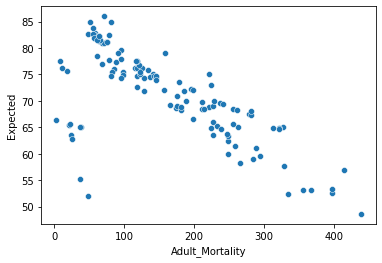

NameError: name 'life' is not defined

In [8]:
sns.scatterplot(data=data, x="Adult_Mortality", y="Expected")
plt.figure.figsize=[20,10]
plt.show()

life[["Adult_Mortality","Expected"]].corr()

In [ ]:
data.head()


x=data["Income_Index"]

x=sm.add_constant(x)

 
y=data.Expected



SLR_model=sm.OLS(y,x).fit()

predictions= SLR_model.predict(x)



residual=data.Expected - predictions

residual=np.abs(residual)


sum_resid=np.sum(residual)



output_residual="{:.13f}".format(np.sum(residual))

print("Sum of all residuals", output_residual)




sample_size=len(data.index)

expected_value= sum_resid/sample_size



output = "{:.13f}".format(expected_value)

##print expected residual value
print("Expected residual value", output)


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

In [9]:
data.head()

x=data[["Polio","Diphtheria ","Hepatitis "]]
y=data["Expected"]

x=sm.add_constant(x)

MLR_model=sm.OLS(y,x).fit()  
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           0.000468
Time:                        20:29:16   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

In [19]:
data=pd.read_csv("C:\\Users\\Ajit Pandiyan\\OneDrive\\Desktop\\Data Sci GL\\Supervised_Learning\\week 1\\inclass\\SLR_In_Class_Lab_Exercise_(Week_1)_Questions\\Life_Expectancy.csv")
print(data["Status"].value_counts())



Developing    105
Developed      19
Name: Status, dtype: int64


In [20]:
life2 = data.copy()

def dev(x):
    if x=="Developed":
        return(1)
    else :
        return(0)

life2=life
life2["status"]=life2["Status"].apply(dev)
life2.Status.value_counts()

In [21]:
life2["Status"]= life2["Status"].apply(dev)

In [22]:
life2["Status"].value_counts()

0    105
1     19
Name: Status, dtype: int64

In [23]:
x=life2[["Polio","Diphtheria ","Hepatitis ","Status"]]
y=life2["Expected"]

import statsmodels.api as sm
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()  
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.00e-09
Time:                        20:35:01   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.2054      3.148     18.805      

<a id="ins"> </a>
## 3. Inferences about slope

In [24]:
#b.drop(["Country"], axis=1,inplace= True)
a=data["Expected"]
b=life2.drop(["Country","Expected"], axis=1)

import statsmodels.api as sm
b=sm.add_constant(b)


model1=sm.OLS(a,b).fit()
print(model1.summary())



MLR_pvalues = pd.DataFrame(model1.pvalues, columns = ["P-Value"])


significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]


signi_var = significant_var.index.to_list()

# print the list of significant variables
signi_var

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.94e-36
Time:                        20:35:06   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

['const',
 'Adult_Mortality',
 'Hepatitis ',
 ' HIV',
 'Population',
 'Income_Index']

In [25]:
b.head()
c=b["Income_Index"]


from sklearn.preprocessing import MinMaxScaler
c=sm.add_constant(c)

scaler = MinMaxScaler()

scaled=scaler.fit_transform(c)

In [26]:
import statsmodels.api as sm
b=sm.add_constant(b)


model1=sm.OLS(a,c).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.13e-34
Time:                        20:35:07   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081   

In [27]:
## Total variation observed in the values of 

In [28]:
pred=model1.predict(c)

In [29]:
ssr=np.sum((pred-a.mean())**2)
print('SSR:',ssr)

SSR: 6270.220680416865


In [30]:
sse=np.sum((a-pred)**2)
print("SSE:",sse)

SSE: 2549.5848034540973


In [31]:
print("SST:",(sse+ssr))

SST: 8819.805483870963


In [32]:
#independent variables
L=data.iloc[:,[15]]

#dependent variables.
y=data.Expected

#building a model with intercept
SLR_model=sm.OLS(y,L).fit()

print(SLR_model.conf_int())

                      0           1
Income_Index  97.009477  102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

In [33]:
b.columns

x= b[["Adult_Mortality","Infant_Deaths","Underfive_Deaths "]]

x=sm.add_constant(x)

a ##Previously saved column for expected.

MLR_Model = sm.OLS(a,x).fit()

print(MLR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.29e-19
Time:                        20:35:13   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.00

In [34]:
b.columns

x= b[["Adult_Mortality","Infant_Deaths","Underfive_Deaths ","Population"]]

x=sm.add_constant(x)

a ##Previously saved column for expected.

MLR_Model = sm.OLS(a,x).fit()

print(MLR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           8.93e-19
Time:                        20:35:13   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.01

In [35]:
z=b.copy()

from sklearn.preprocessing import MinMaxScaler

z=sm.add_constant(z)

scaler = MinMaxScaler()

scaled=scaler.fit_transform(z)

In [36]:
import statsmodels.api as sm
z=sm.add_constant(z)

mod=sm.OLS(a,z).fit()
print(mod.summary())
print(mod.f_pvalue)




                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.94e-36
Time:                        20:35:15   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

z.head()

c=z[["Infant_Deaths","Adult_Mortality"]]

import statsmodels.api as sm
c=sm.add_constant(c)


model1=sm.OLS(a,c).fit()
print(model1.summary())
print(model1.f_pvalue)

c.head()
## Scaling.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled=scaler.fit_transform(c)

p=pd.DataFrame(scaled)


p.head()
#p.drop([0], axis=1,inplace=True)
p.head()

##model after scaling.

import statsmodels.api as sm
p=sm.add_constant(p)


model1=sm.OLS(a,p).fit()
print(model1.summary())


## Here since, there is not much difference in the interdependibility of the independent variables,
## So even after scaling the data, there is no change in the R square and adjusted R square value in the
## obtained output.

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

In [37]:
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.94e-36
Time:                        20:35:18   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

In [38]:
from scipy.stats import shapiro


stat, p_value= shapiro(mod.resid)

print("stat", stat)
print("p_value", p_value)

stat 0.9769425392150879
p_value 0.03209252282977104


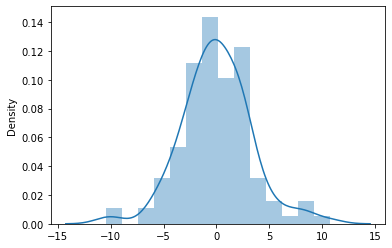

In [39]:
sns.distplot(mod.resid)
plt.show()

In [40]:
z.head()

z["Interaction"]=z["GDP"]*z["Status"]

MLR_mod_interaction= sm.OLS(a,z).fit()

MLR_mod_interaction.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.14e-36
Time:                        20:35:22   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.7216      3.265     17.988      0.000      52.249      65.194
Status                 3.8250      1.489      2.569      0.012       0.873       6.777
Adult_Mortality       -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths          0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis              0.0715      0.032      2.259      0.026       0.009       0.134
Measles            -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
 BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths      -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                 -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria            -0.0446      0.040     -1.124      0.264      -0.123       0.034
 HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP                    0.0001   5.08e-05      2.390      0.019    2.07e-05       0.000
Population         -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19     -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9        0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index          15.9884      6.392      2.501      0.014       3.315      28.662
Schooling              0.4188      0.343      1.220      0.225      -0.262       1.099
Interaction           -0.0001    6.8e-05     -1.902      0.060      -0.000     5.5e-06
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
z=b.copy()

from sklearn.preprocessing import MinMaxScaler

z=sm.add_constant(z)

scaler = MinMaxScaler()

scaled=scaler.fit_transform(z)

import statsmodels.api as sm
z=sm.add_constant(z)

mod=sm.OLS(a,z).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.94e-36
Time:                        20:35:22   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [43]:
df_FEV=pd.read_csv("C:\\Users\\Ajit Pandiyan\\OneDrive\\Desktop\\Data Sci GL\\Supervised_Learning\week 1\\inclass\\SLR_In_Class_Lab_Exercise_(Week_1)_Questions\\lungcapdata.csv")
df_FEV.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


In [44]:
##Yes we can
z=b.copy()

from sklearn.preprocessing import MinMaxScaler

z=sm.add_constant(z)

scaler = MinMaxScaler()

scaled=scaler.fit_transform(z)


import statsmodels.api as sm
z=sm.add_constant(z)

mod=sm.OLS(a,z).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.94e-36
Time:                        20:36:21   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.0318      3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     654 non-null    int64  
 1   Height  654 non-null    float64
 2   Gender  654 non-null    int64  
 3   Smoke   654 non-null    int64  
 4   FEV     654 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 25.7 KB


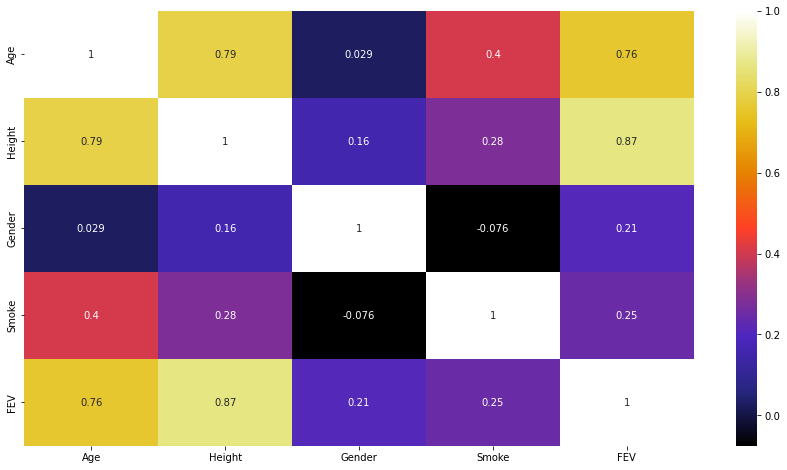

In [52]:
plt.rcParams['figure.figsize'] = [15,8]

sns.heatmap(df_FEV.corr(),annot=True,cmap= plt.cm.CMRmap)


df_FEV.info()



In [35]:
df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)


df_FEV_cat = df_FEV.select_dtypes(include="object")



In [36]:
X =df_FEV_num

# consider the dependent variable
y = df_FEV["FEV"]

# fit a full model with an intercept using fit()
# add_constant(): adds the intercept term to the model
MLR_model = sm.OLS(y, sm.add_constant(X)).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.10e-209
Time:                        22:23:50   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.0

In [37]:
## To check the auto correlation

df_FEV.head()


y=df_FEV["FEV"]
x=df_FEV.drop(columns="FEV")


In [38]:
MLR_model=sm.OLS(y, sm.add_constant(x)).fit()

residuals=MLR_model.resid
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.10e-209
Time:                        22:23:58   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.000      -4.895      -4.019
Age            0.0655      0.009      6.904      0.000       0.047       0.084
Height         0.1042      0.005     21.901      0.000       0.095       0.114
Gender         0.1571      0.033      4.731      0.000       0.092       0.222
Smoke         -0.0872      0.059     -1.472      0.141      -0.204       0.029
==============================================================================
Omnibus:                       22.758   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.271
Skew:                           0.207   Prob(JB):                     4.02e-10
Kurtosis:                       4.190   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

1.6452015855915547

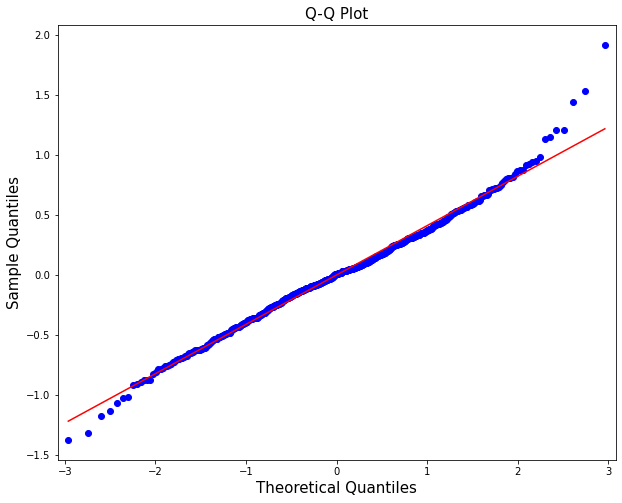

In [40]:
MLR_model.summary()
from statsmodels.graphics.gofplots import qqplot


y=df_FEV["FEV"]
x=df_FEV.drop(columns="FEV")
MLR_model=sm.OLS(y,sm.add_constant(x)).fit()
plt.rcParams['figure.figsize']=(10,8)

qqplot(MLR_model.resid, line='r')
plt.title('Q-Q Plot', fontsize=15)
plt.xlabel('Theoretical Quantiles',fontsize=15)
plt.ylabel('Sample Quantiles',fontsize=15)
plt.show()

<a id="ml_perf"> </a>
## 6. Model Performance

In [41]:
y=df_FEV["FEV"]
x=df_FEV.drop(columns="FEV")
from sklearn.metrics import mean_squared_error

x=sm.add_constant(x)
print(x)
MLR_model=sm.OLS(y,x).fit()

pred=MLR_model.predict(x)
mse=round(mean_squared_error(y,pred),4)

rmse= round(np.sqrt(mse),4)
MLR_model.summary()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

     const  Age  Height  Gender  Smoke
0      1.0    9    57.0       0      0
1      1.0    8    67.5       0      0
2      1.0    7    54.5       0      0
3      1.0    9    53.0       1      0
4      1.0    9    57.0       1      0
..     ...  ...     ...     ...    ...
649    1.0   16    67.0       1      1
650    1.0   15    68.0       1      1
651    1.0   18    60.0       0      0
652    1.0   16    63.0       0      1
653    1.0   15    66.5       0      0

[654 rows x 5 columns]


In [53]:
y_pred = MLR_model.predict(X_test)

# calculating the MSE for the test data and then rounding the value upto 4 digits
mse_test = round(mean_squared_error(y_test, y_pred),4)

# printing the mse for the test set
print("Mean Squared Error (MSE): ", mse_test)

# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# printing the rmse for the test set
print("Root Mean Squared Error (RMSE): ", rmse_test)

Mean Squared Error (MSE):  0.1595
Root Mean Squared Error (RMSE):  0.3994


In [54]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)


mae_test = round(mean_absolute_error(y_test, y_pred),4)

# printing the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

# Calculating the MAPE using the "mape()" function created above

# calculating the MAPE for the  data and then rounding the value upto 4 digits
mape_test = round(mape(y_test, y_pred),4)

# printing the mape for the tra set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Error (MAE) on test set:  0.3017
Mean Absolute Percentage Error (MAPE) on test set:  12.0487


In [45]:

df_FEV_num = df_FEV.select_dtypes(include=np.number).drop(["FEV"],axis=1)


X = df_FEV_num


X = sm.add_constant(X)


y = df_FEV["FEV"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)


MLR_model = sm.OLS(y, X).fit()

# print the model summary
print(MLR_model.summary())

train_pred = MLR_model.predict(X_train)

test_pred = MLR_model.predict(X_test)


mse_train = mean_squared_error(y_train, train_pred)

 
rmse_train = round(np.sqrt(mse_train), 4)


print("\n Root Mean Squared Error (RMSE) on train set: ", rmse_train)


mse_test = mean_squared_error(y_test, test_pred)


rmse_test = round(np.sqrt(mse_test), 4)


print("\n Root Mean Squared Error (RMSE) on test set: ", rmse_test)

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.10e-209
Time:                        22:26:33   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.0